# Logistic Regression and Support Vector Machine Algorithms on Credit Worthiness

The project focuses on applying Logistic Regression (LR) and Support Vector Machine (SVM) algorithms to predict the classification of individuals based on their creditworthiness report. Utilizing various features such as Age, Sex, Job, Housing, Saving accounts, Checking account, Credit amount, and Duration, the study aims to determine the most effective model for this prediction task. By evaluating and comparing the loss function of both LR and SVM, the project seeks to identify the optimal algorithm for accurately categorizing individuals' creditworthiness.

In [37]:
#importing packages and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline

In [292]:
#Importing data
creditdata = pd.read_csv('D:\\Python\\Datafolder\\german credit\\german_credit_data.csv')

In [127]:
creditdata.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Class
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,2


In [276]:
creditdata.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Class'],
      dtype='object')

In [76]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Class             1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [71]:
#Checking null values
creditdata.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Class                 0
dtype: int64

## Visualizing the data

<AxesSubplot:xlabel='Class', ylabel='count'>

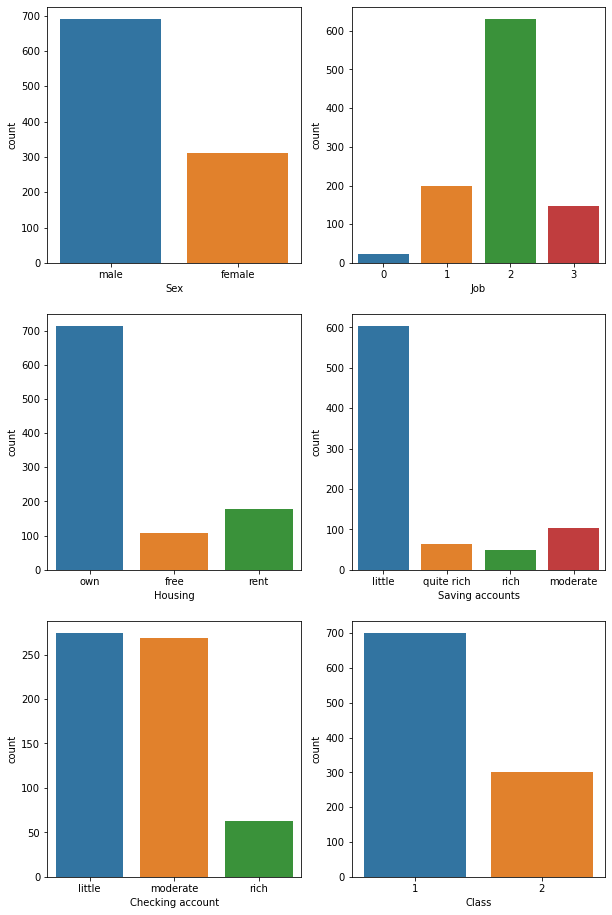

In [69]:
# Creating count plots for Sex, Job, Housing, Saving accounts, Checking account, Credit acoount, and Class
fig, ax =plt.subplots(3, 2, figsize=(10,16))
sns.countplot(x=creditdata['Sex'], ax=ax[0, 0])
sns.countplot(x=creditdata['Job'], ax=ax[0, 1])
sns.countplot(x=creditdata['Housing'], ax=ax[1, 0])
sns.countplot(x=creditdata['Saving accounts'], ax=ax[1, 1])
sns.countplot(x=creditdata['Checking account'], ax=ax[2, 0])
sns.countplot(x=creditdata['Class'], ax=ax[2, 1])

### Replacing the missing values

<AxesSubplot:>

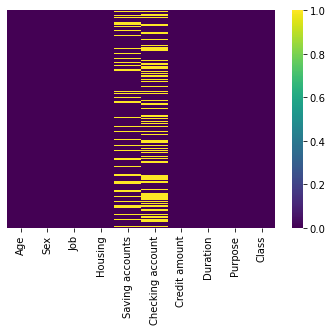

In [293]:
#Checking for the missing values using a heatmap
sns.heatmap(creditdata.isnull(), yticklabels=False, cmap='viridis')

In [128]:
# Filling missing values with maximum count
creditdata['Saving accounts'].fillna('little', inplace=True)
creditdata['Checking account'].fillna('little', inplace=True)

In [129]:
#Checking if there more missing values
creditdata.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Class               0
dtype: int64

## Changing the data to categorical variables

In [130]:
# Changing the categorical variables to numerical variables
newcreditdata = pd.get_dummies(data=creditdata, columns=['Sex','Housing', 'Saving accounts', 'Checking account','Class' ], drop_first=True)

In [131]:
# Dropping the purpose column
newcreditdata.drop(['Purpose'], axis=1, inplace=True)

In [134]:
# Renaming columns
newcreditdata.rename(columns = {'Sex_male':'Sex', 'Class_2':'Class'}, inplace = True)

In [135]:
newcreditdata.head()

,Age,Job,Credit amount,Duration,Sex,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Class
0,67,2,1169,6,1,1,0,0,0,0,0,0,0
1,22,2,5951,48,0,1,0,0,0,0,1,0,1
2,49,1,2096,12,1,1,0,0,0,0,0,0,0
3,45,2,7882,42,1,0,0,0,0,0,0,0,0
4,53,2,4870,24,1,0,0,0,0,0,0,0,1


In [133]:
newcreditdata.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_male', 'Housing_own',
       'Housing_rent', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_moderate', 'Checking account_rich', 'Class_2'],
      dtype='object')

## Training and Testing Data

In [169]:
# Dividing data into independent and dependent variables (X, y)
X= newcreditdata.drop('Class', axis=1)
y= newcreditdata['Class']

In [205]:
# splitting data it into training and testing 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=1)

## Using Logistic Regression

In [206]:
#Importing the Logistic regression algorithm
from sklearn.linear_model import LogisticRegression

lorgmodel = LogisticRegression()

In [224]:
# Trianing the model
ModelTrain = lorgmodel.fit(X_train, y_train)

In [225]:
#Model Coefficients
ModelTrain.coef_

array([[-2.27664693e-02, -8.42701010e-02,  1.57059337e-05,
         3.49590994e-02, -3.59667710e-01, -5.42256790e-01,
         1.89903478e-01, -1.48807859e-02, -1.44797479e-01,
        -3.27667495e-01,  3.00005544e-01, -5.16905940e-02]])

In [208]:
# Using the model to predict
predicted = ModelTrain.predict(X_test)

In [ ]:
# Plotting training results against predictions
plt.figure(figsize=(10, 6))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predicted, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.title('Plotting Actual results against predicted')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Values')
plt.legend(loc="upper right")


### Accuracy Score

In [209]:
#Checking accuracy score of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

0.7233333333333334

In [211]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[199,  15],
       [ 68,  18]], dtype=int64)

### Error of the prediction

In [210]:
#Checking for the error of prediction
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, predicted)


0.27666666666666667

## Logistic Regression Loss function

In [260]:
from sklearn.metrics import log_loss

log_loss(y_test, predicted)


9.5557681157968

In [278]:
# Slicing some part of the y_test data for the creation of the plot
ytest=np.array(y_test)
ytest1 = ytest[1:20]

In [279]:
ytest1

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=uint8)

In [280]:
# Slicing some part of the predicted data for the creation of the plot
y_predicted= np.array(predicted)
ypredicted1= y_predicted[1:20]

In [281]:
ypredicted1

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
      dtype=uint8)

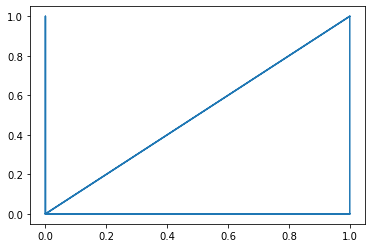

In [284]:
# Loss function chart
plt.plot(ytest1, ypredicted1)
plt.show()

## Using Support Vector Machine

In [213]:
#Importing the SVM algorithm
from sklearn import svm

svmmodel = svm.SVR()

In [214]:
# Trianing the model
ModelTrain1 = svmmodel.fit(X_train, y_train)

In [215]:
# Using the model to predict
predicted1 = ModelTrain1.predict(X_test)

### SVM Error of prediction

In [217]:
#Checking for the error of prediction
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, predicted1)

0.2340025944359387

## SVM Loss function

In [263]:
# Displaying the loss function
log_loss(y_test, predicted1)

0.7228514872139349

In [285]:
ytest1=np.array(y_test)
ytest2 = ytest1[1:20]

In [286]:
ytest2

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=uint8)

In [288]:
y_predicted1= np.array(predicted1)
ypredicted2= y_predicted1[1:20]

In [289]:
ypredicted2

array([0.90435192, 0.10020473, 0.09976797, 0.10058678, 0.09973551,
       0.10192948, 0.09963661, 0.09981902, 0.10032565, 0.10028416,
       0.0997198 , 0.09671731, 0.09984167, 0.09541932, 0.10027809,
       0.10037453, 0.10020686, 0.10033498, 0.14800145])

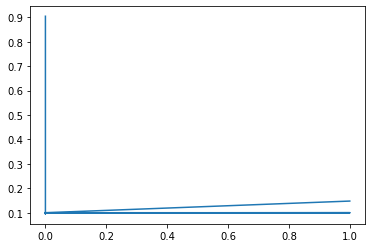

In [290]:
# Ploting the SVM loss function
plt.plot(ytest2, ypredicted2)
plt.show()